# CSE 25 - Introduction to Artificial Intelligence
## Worksheet 6: Learning by Reducing Error

**Context (from last class):**  
Last time, we fit a line by manually adjusting parameters and measuring error.
We saw that different parameter values lead to different errors.

Today, we focus on the question:
**How can a system automatically change its parameters to reduce error?**

**Learning Objectives:**
By the end of today’s class, you will be able to:

- Interpret error as a function of a model parameter.
- Explain how changing a parameter affects error.
- Describe brute-force search as a way to find better parameters.
- Explain, at a high level, how slope (rate of change) tells us *which direction* to adjust a parameter.
- Connect these ideas to the motivation behind gradient descent.

**Instructions**

Create a copy of this notebook and complete it during class.  
Work through the cells below **in order**.

You may discuss with your neighbors, but make sure you understand each step yourself.

**Submission**

When finished, download the notebook as a PDF and upload it to Gradescope under  
`In-Class – Week 4 Tuesday`.

To download as a PDF on DataHub:
`File -> Save and Export Notebook As -> PDF`

### From last time

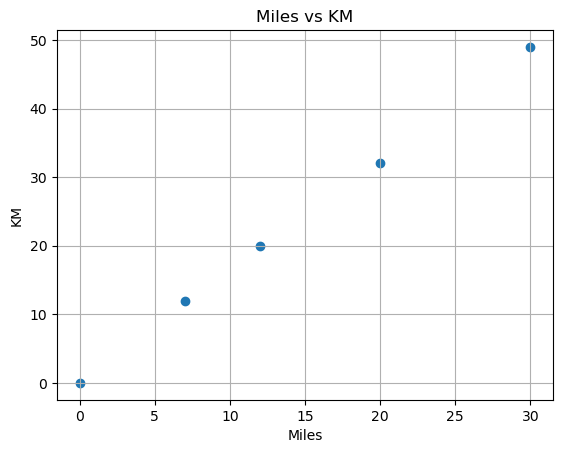

In [1]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Data for miles and corresponding kilometers
# Stored in lists
miles = [0, 7, 12, 20, 30] # x-axis values (INPUT DATA)
km = [0, 12, 20, 32, 49] # y-axis values (OUTPUT DATA)

# Create a scatter plot - using plt.scatter() function
plt.scatter(miles, km)

# Add labels and title using plt.xlabel(), plt.ylabel(), and plt.title() functions
plt.xlabel('Miles')
plt.ylabel('KM')
plt.title('Miles vs KM')
plt.grid()

# Show the plot using plt.show() function
plt.show()

In [3]:
def get_pointwise_absolute_error(actual_values, predicted_values):
    '''
    actual_values: list of actual output values
    predicted_values: list of predicted output values

    Complete the function that calculates the absolute error between predicted and actual values for each value and returns a list of these absolute errors.
    '''
     # Initialize an empty list to store errors
    errors = []
    
    # Calculate the absolute error for each point and store it in the list
    for actual_value_idx in range(len(actual_values)):
        errors.append(abs(actual_values[actual_value_idx] - predicted_values[actual_value_idx]))
    
    # Return the list of absolute errors
    return errors


def get_total_error(errors):
    '''
    errors: list of errors for each data point
    Complete the function that calculates the total error by summing the values of the individual errors. Return the total error.
    '''
    # Use the sum() function to calculate the total error
    return sum(errors)

def get_predictions_v2(input_values, w, b):
    '''
    input_values: list of input values
    w: weight (slope)
    b: bias (intercept)

    Complete the function that calculates the predicted output values using the weight and bias. 
    Return a list of predicted values.
    '''
    # Initialize an empty list to store predicted values
    predicted_values = []

    # Calculate predicted values using the formula: predicted_value = input_value * w + b
    # Append each predicted value to the predicted_values list
    for input_value in input_values:
        predicted_values.append(input_value * w + b)
    # Return the list of predicted values
    return predicted_values


In [4]:
# Brute-force search for the best weight (conversion factor) with bias fixed to 0

best_weight = None # Initialize best weight
lowest_error = float('inf') # Initialize to a very high value

weights = [] # To store weights tried
total_error_list = [] # To store total errors for each weight

w = 1.0
b = 0.0
step_size = 0.001

while w <= 2.0:
    predicted = get_predictions_v2(miles, w, b)
    errors = get_pointwise_absolute_error(km, predicted)
    total_error = get_total_error(errors)
    total_error_list.append(total_error) # for the plot
    weights.append(w) # for the plot
    if total_error < lowest_error:
        lowest_error = total_error
        best_weight = w
    w += step_size

print(f'Best weight (conversion factor): {best_weight:.4f}')
print(f'Lowest total error: {lowest_error:.2f}')


Best weight (conversion factor): 1.6330
Lowest total error: 1.64


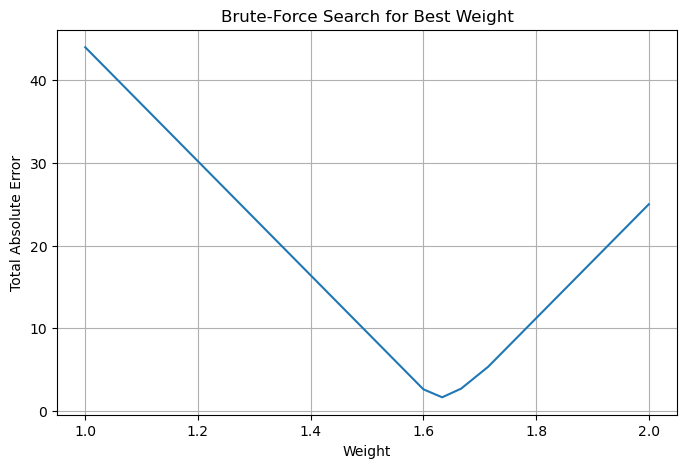

In [5]:

plt.figure(figsize=(8,5))

# Changed the plot from scatter to line plot to visualize total error vs weight
plt.plot(weights,  total_error_list)

plt.xlabel("Weight")
plt.ylabel("Total Absolute Error")
plt.title("Brute-Force Search for Best Weight")
plt.grid()
plt.show()

### Problem: Total error depends on dataset size!


In [6]:

# Lets say we are given many more data points - what would happen to the total error?

miles_many = [0, 5, 7, 10, 12, 15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45, 47, 50]
km_many = [0, 8, 12, 16, 20, 24, 29, 32, 36, 41, 44, 49, 52, 57, 60, 65, 68, 73, 76, 81]

# Use the best_weight and b from previous cells to get the total error on the original points
predicted_original = get_predictions_v2(miles, best_weight, b)
errors_original = get_pointwise_absolute_error(km, predicted_original)
total_error_original = get_total_error(errors_original)

# Use best_weight and b from previous cells to get the total error on more data points
# YOUR CODE HERE
predicted_many = get_predictions_v2(miles_many, best_weight, b)
errors_many = get_pointwise_absolute_error(km_many, predicted_many)
total_error_many = get_total_error(errors_many)

print(f'Total error (original points): {total_error_original:.2f}')
print(f"Total error (many more points): {total_error_many:.2f}")

Total error (original points): 1.64
Total error (many more points): 6.99


#### Why does the total error increase with more data points?

Notice that even if our model fits the data just as well, the total error becomes much larger when we have more data points. This is because the total error is simply the sum of all individual errors, so adding more points (even with similar errors per point) will always increase the total.

This means that total error depends on the size of the dataset, not just how well the model fits. To fairly compare models or datasets of different sizes, we need a metric that is independent of the number of data points.

A common solution is to use the **mean (average) error per point**, called the **Mean Absolute Error (MAE)**. This gives us a normalized measure of error that is easier to compare across datasets.

The Mean Absolute Error (MAE) is calculated as:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

where:
- $n$ is the number of data points
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value


In [7]:
# Complete the function that calculates the Mean Absolute Error (MAE) between predicted and actual values.

def get_mean_absolute_error(actual_values, predicted_values):
    '''
    actual_values: list of actual output values
    predicted_values: list of predicted output values

    Complete the function that calculates the Mean Absolute Error (MAE) between predicted and actual values.
    Return the MAE.
    '''
    # Initialize a list to store the absolute errors
    # YOUR CODE HERE
    abs_errors = []

    # Loop through each value in actual_values and predicted_values 
    # to calculate the absolute error and store it in the list
    # YOUR CODE HERE
    for idx, actual_val in enumerate(actual_values):
        abs_error = abs(actual_val - predicted_values[idx])
        abs_errors.append(abs_error)

    total_abs_error = sum(abs_errors)
    mean_abs_error = total_abs_error/len(abs_errors)
    # Calculate the mean absolute error (MAE) by dividing the total absolute error by the number of values
    # YOUR CODE HERE

    # Return the MAE
    return mean_abs_error
    # YOUR CODE HERE

In [8]:
# --- Test Cases ---

# Test 1: Simple integers
act1 = [10, 20, 30]
pre1 = [12, 18, 25]

# Calculation: (|10-12| + |20-18| + |30-25|) / 3 = (2 + 2 + 5) / 3 = 3.0
print(f"Test 1 Results: {get_mean_absolute_error(act1, pre1)}")

# Test 2: Perfect match (Error should be 0)
act2 = [1.5, 2.5, 3.5]
pre2 = [1.5, 2.5, 3.5]
print(f"Test 2 Results: {get_mean_absolute_error(act2, pre2)}")

# Test 3: Large differences
act3 = [100, 0]
pre3 = [0, 100]
# Calculation: (|100-0| + |0-100|) / 2 = (100 + 100) / 2 = 100.0
print(f"Test 3 Results: {get_mean_absolute_error(act3, pre3)}")

Test 1 Results: 3.0
Test 2 Results: 0.0
Test 3 Results: 100.0


Let's run our brute force search again, but this time, we will use the MAE intead. 

In [9]:
# Brute-force search for the best weight (conversion factor) with bias fixed to 0
# Using Mean Absolute Error as the error metric

best_weight = None # Initialize best weight
lowest_error = float('inf') # Initialize to a very high value

weights = [] # To store weights tried
mean_absolute_errors_list = [] # To store mean absolute errors for each weight

w = 1.0
b = 0.0
step_size = 0.001

while w <= 2.0:
    predicted = get_predictions_v2(miles, w, b)
    mean_absolute_error = get_mean_absolute_error(km, predicted) # This line was changed
    mean_absolute_errors_list.append(mean_absolute_error) # for the plot
    weights.append(w) # for the plot
    if mean_absolute_error < lowest_error:
        lowest_error = mean_absolute_error
        best_weight = w
    w += step_size

print(f'Best weight (conversion factor): {best_weight:.4f}')
print(f'Lowest mean absolute error: {lowest_error:.2f}')


Best weight (conversion factor): 1.6330
Lowest mean absolute error: 0.33


In [10]:

# Use the best_weight and b from previous cells to get the mean absolute error on the original points
predicted_original = get_predictions_v2(miles, best_weight, b)
mean_absolute_error_original = get_mean_absolute_error(km, predicted_original)

# Use the best_weight and b from previous cells to get the mean absolute error on the many points
# YOUR CODE HERE
predicted_many = get_predictions_v2(miles_many, best_weight, b)
mean_absolute_error_many = get_mean_absolute_error(km_many, predicted_many)

print(f'Mean absolute error (original points): {mean_absolute_error_original:.2f}')
print(f"Mean absolute error (many more points): {mean_absolute_error_many:.2f}")

Mean absolute error (original points): 0.33
Mean absolute error (many more points): 0.35


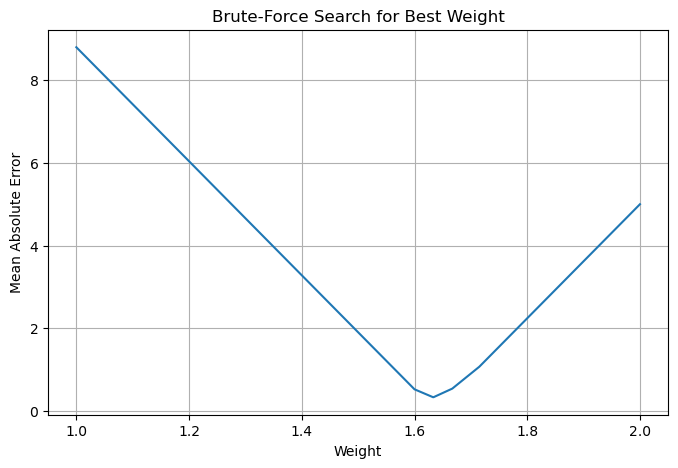

In [11]:
plt.figure(figsize=(8,5))
plt.plot(weights,  mean_absolute_errors_list)
plt.xlabel("Weight")
plt.ylabel("Mean Absolute Error")
plt.title("Brute-Force Search for Best Weight")
plt.grid()
plt.show()

What changed in the graph? Did the shape of the graph change or remain the same?

`YOUR ANSWER HERE`

### Error as a function


What is a function? 

`YOUR ANSWER HERE`

We can say that the error $e$, is a function of the weight, $w$.

As weight changes on the x-axis, the error changes on the y-axis in the plot above. 

In the last class, we used a brute force approach to find the best parameters for our model (line). What if we can use a better method to find the best parameters. 

What is our parameter in the model: $$y=wx$$

Parameter: $w$

Now if we can somehow know how changing $w$ changes the error, we could use that information to update the parameter value, instead of using the brute-force method. And we know that the error is a function of weight! 


Let's rewrite the error as a function of the weight:
$$e = f(w)$$

Let's say we change our weight $w$  by adding a **very small** value, say $\epsilon > 0$, the new error $e^\prime$ is now:
$$e^\prime = f(w+\epsilon)$$

Now I want to see the ratio of how the error changed, with respect to the change in weight.
$$\frac{e^\prime - e}{\epsilon} = \frac{f(w+\epsilon) - f(w)}{\epsilon}$$

This ratio is a way to measure how sensitive the error is to small changes in the weight. 



### Derivative

The equation in the last cell is a **finite difference approximation** of the derivatie.

The **limit definition of the derivative** is:

$$
\frac{de}{dw} = \lim_{dw \to 0} \frac{f(w+dw) - f(w)}{dw}
$$

[Video Link for Derivative](https://youtu.be/9vKqVkMQHKk?si=KcqjJqi4GPrGVQqj)

This tells us the exact rate at which the error $e$ changes as we make tiny changes to the weight $w$.

In [12]:
# Complete the function that calculates the derivative of error with respect to weight (w) using limit definition

def get_derivative_error_wrt_weight(error_function, input_values, actual_values, w, b, dw=1e-6):
    """
    Calculates the derivative of the error with respect to weight (w) using the limit definition.

    error_function: function to compute error
    input_values: list of input values
    actual_values: list of actual output values
    w: current weight
    b: current bias
    
    dw: small value for finite difference approximation

    Returns:
        derivative (float): Approximate derivative of error with respect to w
    """
    # Get predictions at current w
    predicted_w = get_predictions_v2(input_values, w, b)

    # Compute error at w
    error_w = error_function(actual_values, predicted_w) # ?? f(w)
    
    # Get predictions at w + dw
    predicted_w_dw = get_predictions_v2(input_values, w + dw, b)
    
    # Compute error at w + dw
    error_w_dw = error_function(actual_values, predicted_w_dw) # ?? f(w+dw)
    
    # Approximate derivative using the limit definition above
    # YOUR CODE HERE
    derivative = (error_w_dw - error_w) / dw # f(w+dw) - f(w) / 
    

    return derivative

In [13]:
# TEST CASE FOR DERIVATIVE FUNCTION (get_derivative_error_wrt_weight)

# Compute the derivative of the error with respect to weight at w=1

derivative = get_derivative_error_wrt_weight(
    get_mean_absolute_error, miles, km, 1, b
)

# Should output: w=1.00: -13.8000
print(f"Derivative of error with respect to weight at w={1:.2f}: {derivative:.4f}")


Derivative of error with respect to weight at w=1.00: -13.8000


### Mean Squared Error (MSE)

While Mean Absolute Error (MAE) is easy to interpret, it is **not a smooth function** - it is non-differentiable at zero, which makes it harder to optimize using gradient based methods.

Mean Squared Error (MSE) is another common way to measure error. It is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:
- $n$ is the number of data points,
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value.

**Why might we prefer MSE over MAE?**
- MSE is a **smooth, differentiable function**, which makes it easier to use with gradient-based optimization methods.
- MSE **penalizes larger errors more heavily** (because errors are squared), which can be useful if we want to avoid large mistakes.
- The mathematical properties of MSE make it easier to analyze and work with in many machine learning algorithms.


In [15]:
# Complete the function that calculates the Mean Squared Error (MSE) between predicted and actual values.

def get_mean_squared_error(actual_values, predicted_values):
    '''
    actual_values: list of actual output values
    predicted_values: list of predicted output values

    Complete the function that calculates the Mean Squared Error (MSE) between predicted and actual values.
    Return the MSE.
    '''
    # Initialize list to store squared errors
    # YOUR CODE HERE

    # Loop through each value and accumulate the squared error
    # YOUR CODE HERE

    # Calculate the mean squared error (MSE) by dividing the total squared error by the number of values
    # YOUR CODE HERE

    # Return the MSE
    # YOUR CODE HERE
    squared_errors = []

    # Loop through each value in actual_values and predicted_values 
    # to calculate the absolute error and store it in the list
    # YOUR CODE HERE
    for idx, actual_val in enumerate(actual_values):
        squared_error = (actual_val - predicted_values[idx])**2
        squared_errors.append(squared_error)

    total_squared_error = sum(squared_errors)
    mean_squaered_error = total_squared_error/len(squared_errors)
    # Calculate the mean absolute error (MAE) by dividing the total absolute error by the number of values
    # YOUR CODE HERE

    # Return the MAE
    return mean_squaered_error
    

In [16]:
# --- Test Cases for MSE ---

# Test 1: Simple integers
# Calculation: ((10-12)^2 + (20-18)^2 + (30-25)^2) / 3 
# = ((-2)^2 + (2)^2 + (5)^2) / 3 = (4 + 4 + 25) / 3 = 11.0
act1 = [10, 20, 30]
pre1 = [12, 18, 25]
print(f"Test 1 (Small errors): {get_mean_squared_error(act1, pre1)}")

# Test 2: Perfect match
# Calculation: 0^2 + 0^2 = 0
act2 = [1.0, 2.0]
pre2 = [1.0, 2.0]
print(f"Test 2 (Perfect):      {get_mean_squared_error(act2, pre2)}")

# Test 3: The "Outlier" penalty
# Notice: One error is 10, the other is 0. 
# Calculation: (10^2 + 0^2) / 2 = 100 / 2 = 50.0
act3 = [10, 0]
pre3 = [0, 0]
print(f"Test 3 (One big error): {get_mean_squared_error(act3, pre3)}")

Test 1 (Small errors): 11.0
Test 2 (Perfect):      0.0
Test 3 (One big error): 50.0


Let's run our brute force search again, but this time, we will use the MSE intead. 

In [17]:
# Brute-force search for the best weight (conversion factor) with bias fixed to 0

best_weight = None # Initialize best weight
lowest_error = float('inf') # Initialize to a very high value

weights = [] # To store weights tried
mean_squared_errors_list = [] # To store mean squared errors for each weight

w = 1.0
b = 0.0
step_size = 0.001

while w <= 2.0:
    predicted = get_predictions_v2(miles, w, b)
    mean_squared_error = get_mean_squared_error(km, predicted)
    mean_squared_errors_list.append(mean_squared_error) # for the plot
    weights.append(w) # for the plot
    if mean_squared_error < lowest_error:
        lowest_error = mean_squared_error
        best_weight = w
    w += step_size

print(f'Best weight (conversion factor): {best_weight:.4f}')
print(f'Lowest mean squared error: {lowest_error:.2f}')


Best weight (conversion factor): 1.6300
Lowest mean squared error: 0.18


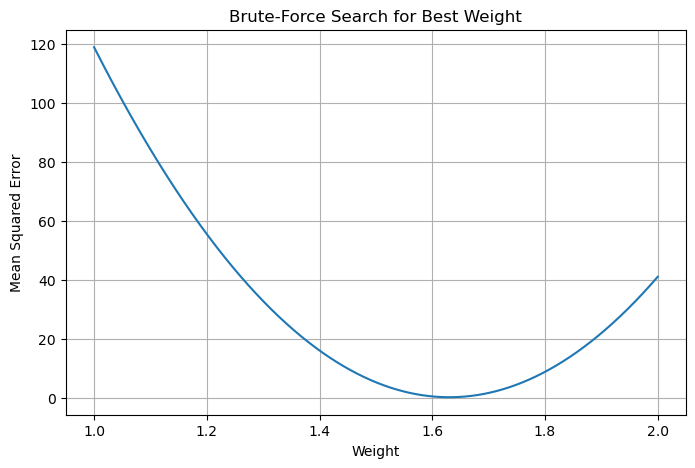

In [18]:
plt.figure(figsize=(8,5))
plt.plot(weights,  mean_squared_errors_list)
plt.xlabel("Weight")
plt.ylabel("Mean Squared Error")
plt.title("Brute-Force Search for Best Weight")
plt.grid()
plt.show()

**Note:**  You do **not** need to understand the code in the next cell.  

Just run the cell and use the slider to see how changing the weight affects the error and the tangent line at that point on the curve.

In [24]:
import numpy as np
from ipywidgets import interact, FloatSlider

def plot_tangent(weight):
    # Find the closest index in weights to the selected weight
    idx = np.abs(np.array(weights) - weight).argmin()

    x0 = weights[idx]
    y0 = mean_squared_errors_list[idx]

    # Use the derivative function to get the slope at x0
    slope = get_derivative_error_wrt_weight(
        get_mean_squared_error, miles, km, x0, 0.0
    )

    # Tangent line: y = slope * (x - x0) + y0, but keep it short
    x_tangent = np.linspace(x0 - 0.05, x0 + 0.05, 20)
    y_tangent = slope * (x_tangent - x0) + y0

    plt.figure(figsize=(8,5))
    plt.plot(weights, mean_squared_errors_list, label="Error Curve")
    plt.plot(x_tangent, y_tangent, 'r--', label=f"Tangent at w={x0:.3f}")
    plt.scatter([x0], [y0], color='red', zorder=5)
    plt.xlabel("Weight")
    plt.ylabel("Mean Squared Error")
    plt.title("Interactive Tangent to Error Curve")
    plt.legend()
    plt.grid()
    plt.show()

interact(plot_tangent, weight=FloatSlider(min=min(weights), max=max(weights) - 0.01, step=0.01, value=1, description='Weight'))

interactive(children=(FloatSlider(value=1.0, description='Weight', max=1.9899999999998899, min=1.0, step=0.01)…

<function __main__.plot_tangent(weight)>

#### What to Notice in the Tangent Line Graph

- As you move the weight slider, notice how the red dashed tangent line changes.
- The tangent line always touches the error curve at exactly one point (the current weight).

- **Pay attention to the angle (slope) of the tangent line:**  
  - Where the error curve is steep, the tangent line is also steep (more vertical).
  - Where the error curve is flat (near the minimum), the tangent line is almost horizontal.

- **The length of the tangent line segment (visually)** appears to change:
  - This is because the **vertical distance** covered by the line depends on the slope.
  - The x-range is always the same, but a steeper slope makes the line look longer up and down.
  
- **Try to find the minimum:**  
  - At the lowest point of the error curve, the tangent line is flat (slope = 0).
  - This is where the error is minimized and the model is best.

> **Key idea:**  
> The tangent line shows how the error would change if you increased or decreased the weight a little bit. The steeper the tangent, the faster the error is changing at that point.

When the new error value is `greater` than the old error value:

1. What is the sign of this fraction? $$ \frac{f(w+dw) - f(w)}{dw}$$

    A. Positive

    B. Negative

    `YOUR ANSWER HERE`

2. This means that increasing $w$, ________ the performance?

    A. worsens

    B. betters


    `YOUR ANSWER HERE`

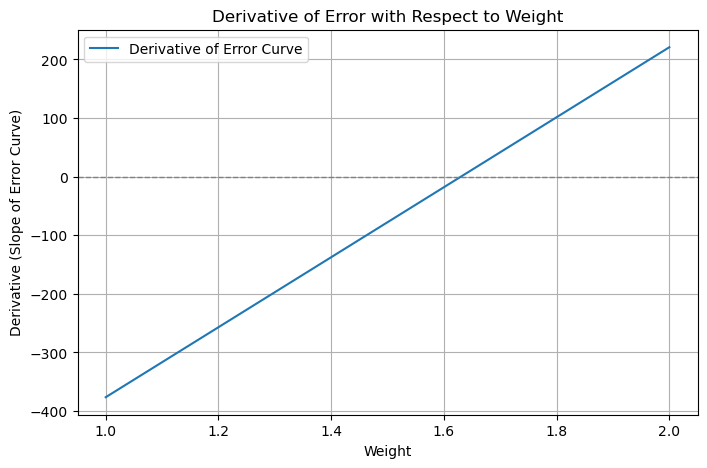

In [25]:
# Plot showing the derivative of the error curve with respect to weight

derivatives = []
for w in weights:
    grad = get_derivative_error_wrt_weight(get_mean_squared_error, miles, km, w, 0.0)
    derivatives.append(grad)

plt.figure(figsize=(8,5))
plt.plot(weights, derivatives, label="Derivative of Error Curve")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Weight")
plt.ylabel("Derivative (Slope of Error Curve)")
plt.title("Derivative of Error with Respect to Weight")
plt.grid()
plt.legend()
plt.show()

### Gradient Descent

The derivative of the **error with respect to a parameter** tells us two things.

#### 1. Direction (sign)
- If the derivative is **positive**, increasing the parameter increases the error.  
  To reduce error, we should **decrease** the parameter.
- If the derivative is **negative**, increasing the parameter decreases the error.  
  To reduce error, we should **increase** the parameter.

**Key idea:** to reduce error, move the parameter in the **opposite direction of the derivative**.

#### 2. Amount (magnitude)
- A **large** derivative means the error is changing quickly **at the current parameter value**.
- A **small** derivative means the error is changing slowly.

The derivative tells us how steep the error surface is, but not how far we should move.

Putting this together, we update the parameter by moving **opposite the derivative**, scaled by a small constant that controls how big each step is.

This idea is exactly what **gradient descent** formalizes.


#### Adding the learning rate

The derivative gives us the direction we should move and how steep the error surface is locally. However, we usually do **not** want to move the full amount suggested by the derivative.

If we always took the full step, updates could be too large and overshoot the minimum.

To control this, we introduce a **learning rate**.

The learning rate is a small positive number that **scales the update**.  
It lets us move in the right direction, but in **small, controlled steps**.

Putting this together, we update the parameter by:
- Moving in the **opposite direction of the derivative**, and
- Scaling that movement by the **learning rate**.

This gives the update rule:

$$
\text{new\_parameter}
=
\text{old\_parameter}
-
(\text{learning rate}) \times (\text{derivative})
$$

With this rule:
- The **derivative** determines the direction of the update.
- The **learning rate** determines how big each step is.

Repeating this update over many steps is what we call **gradient descent**.

You can see this process visually as moving downhill on the error curve, step by step.

#### Exercise: Implement Gradient Descent

Fill in the missing code below to complete a simple gradient descent algorithm for finding the best weight.  
You will:

- Use the current weight to make predictions.
- Compute the mean squared error for those predictions.
- Calculate the derivative of the error with respect to the weight.
- Update the weight using the gradient descent rule.

**Goal:**  
Your code should print:
- `Best weight found by gradient descent: 1.6303`
- `Mean squared error at best weight: 0.1823`

Replace each `# YOUR CODE HERE` with the correct line of code.

In [ ]:
# Gradient Descent - Complete the code below
# It should print:
# Best weight found by gradient descent: 1.6303
# Mean squared error at best weight: 0.1823

# Step 0: Initialize parameters
w_gd = 10.0
b_gd = 0.0

# Set the learning rate
learning_rate = 0.001

# Set the number of gradient descent steps
num_steps = 1000

# Lists to track how weight and error change over time
weights_gd = []
errors_gd = []

for step in range(num_steps):

    # Use the current weight to make predictions
    predicted = 
    # YOUR CODE HERE

    # Compute the mean squared error of the predictions
    error = 
    # YOUR CODE HERE

    # Track the current weight and error
    weights_gd.append(w_gd)
    errors_gd.append(error)

    # Compute the derivative of the error with respect to the weight
    grad = 
    # YOUR CODE HERE

    # Update the weight using gradient descent
    w_gd = 
    # YOUR CODE HERE

print(f"Best weight found by gradient descent: {w_gd:.4f}")
print(f"Mean squared error at best weight: {errors_gd[-1]:.4f}")

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(weights_gd, errors_gd, marker='o', markersize=2, label='Gradient Descent Path')
plt.xlabel("Weight")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Progress")
plt.grid()
plt.legend()
plt.show()

## Celcius and Fahrenheit

In [ ]:
# Data for Fahrenheit and Celsius
fahrenheit = [32, 50, 68, 86, 104] # x-axis values (INPUT DATA)
celsius = [0, 10, 20, 30, 40] # y-axis values (OUTPUT DATA)


best_weight = None
best_bias = None
lowest_error = float('inf')

weights = []
weight_step_size = 0.01

biases = []
bias_step_size = 0.5

errors_for_plot_mae = []
errors_for_plot_mse = []

weight = 0.4
while weight <= 0.7:
    bias = -30.0
    while bias <= -10.0:
        mean_absolute_error = get_mean_absolute_error(
            celsius,
            get_predictions_v2(fahrenheit, weight, bias)
        )
        mean_squared_error = get_mean_squared_error(
            celsius,
            get_predictions_v2(fahrenheit, weight, bias)
        )

        weights.append(weight)
        biases.append(bias)
        errors_for_plot_mae.append(mean_absolute_error)
        errors_for_plot_mse.append(mean_squared_error)


        if mean_squared_error < lowest_error:
            lowest_error = mean_squared_error
            best_weight = weight
            best_bias = bias

        bias += bias_step_size
    weight += weight_step_size

print(f"Best weight: {best_weight:.4f}")
print(f"Best bias: {best_bias:.2f}")
print(f"Lowest total error: {lowest_error:.2f}")


NameError: name 'get_mean_absolute_error' is not defined

**Note:**  You do **not** need to understand the code in the next cell.  

Just run the cell to see the plot of the error surface in 3D.

In [ ]:
import plotly.graph_objects as go

# MAE plot
fig_mae = go.Figure(data=[go.Scatter3d(
    x=weights,
    y=biases,
    z=errors_for_plot_mae,
    mode='markers',
    marker=dict(
        size=5,
        color=errors_for_plot_mae,
        colorscale='Viridis',
        colorbar=dict(title='MAE')
    )
)])
fig_mae.add_trace(go.Scatter3d(
    
    x=[best_weight],
    y=[best_bias],
    z=[min(errors_for_plot_mae)],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Best Parameters'
))
fig_mae.update_layout(
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='MAE'
    ),
    title='MAE Surface: Weight vs Bias',
    
    width=1000,  # Increase width
    height=800   # Increase height
)
fig_mae.show()

# MSE plot
fig_mse = go.Figure(data=[go.Scatter3d(
    x=weights,
    y=biases,
    z=errors_for_plot_mse,
    mode='markers',
    marker=dict(
        size=5,
        color=errors_for_plot_mse,
        colorscale='Viridis',
        colorbar=dict(title='MSE')
    )
)])
fig_mse.add_trace(go.Scatter3d(
    x=[best_weight],
    y=[best_bias],
    z=[min(errors_for_plot_mse)],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Best Parameters'
))
fig_mse.update_layout(
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='MSE'
    ),
    title='MSE Surface: Weight vs Bias',
    width=1000,  # Increase width
    height=800   # Increase height
)
fig_mse.show()

### Calculating the Gradient with Respect to Both $w$ and $b$

When our model is $y = wx + b$, the error (e.g., mean squared error) depends on both $w$ (weight) and $b$ (bias). To optimize both parameters, we need to compute the partial derivatives (gradients) of the error with respect to each parameter:

- $\frac{\partial E}{\partial w}$: How the error changes as $w$ changes, keeping $b$ fixed.
- $\frac{\partial E}{\partial b}$: How the error changes as $b$ changes, keeping $w$ fixed.

We can approximate these using the finite difference method:

$$
\frac{\partial E}{\partial w} \approx \frac{E(w+\epsilon, b) - E(w, b)}{\epsilon}
$$

$$
\frac{\partial E}{\partial b} \approx \frac{E(w, b+\epsilon) - E(w, b)}{\epsilon}
$$

Where $E(w, b)$ is the error function, and $\epsilon$ is a small number. These gradients can then be used to update both $w$ and $b$ in gradient descent.

### Exercise: Compute Gradients for Both Weight and Bias

Fill in the missing code below to complete the function that approximates the partial derivatives (gradients) of the error with respect to both the weight ($w$) and the bias ($b$) using finite differences.

You will:
- Compute predictions and error at the current $(w, b)$.
- Compute predictions and error at $(w+\epsilon, b)$ and $(w, b+\epsilon)$.
- Approximate the partial derivatives with respect to $w$ and $b$.
- Return both gradients.

**Goal:**  
Replace each `# YOUR CODE HERE` with the correct line of code so the function returns the correct gradients for $w$ and $b$.

In [ ]:
def get_gradients_w_b(error_function, input_values, actual_values, w, b, epsilon=1e-6):
    """
    Approximates the partial derivatives of the error with respect to w and b
    using finite differences.

    Returns:
        (grad_w, grad_b)
    """

    # Step 1: Compute predictions using the current parameters (w, b)
    predicted =
    # YOUR CODE HERE

    # Step 2: Compute the error at (w, b)
    error =
    # YOUR CODE HERE

    # --- Partial derivative with respect to w ---

    # Step 3: Compute predictions at (w + epsilon, b)
    predicted_w =
    # YOUR CODE HERE

    # Step 4: Compute the error at (w + epsilon, b)
    error_w =
    # YOUR CODE HERE

    # Step 5: Approximate the partial derivative with respect to w
    grad_w =
    # YOUR CODE HERE

    # --- Partial derivative with respect to b ---

    # Step 6: Compute predictions at (w, b + epsilon)
    predicted_b =
    # YOUR CODE HERE

    # Step 7: Compute the error at (w, b + epsilon)
    error_b =
    # YOUR CODE HERE

    # Step 8: Approximate the partial derivative with respect to b
    grad_b =
    # YOUR CODE HERE

    return grad_w, grad_b

In [ ]:
# TEST CASE FOR GRADIENT FUNCTION (get_gradients_w_b)
# Should pring 47.20527200133274 0.8000010005004832

w_gradient, b_gradient = get_gradients_w_b(
    get_mean_squared_error, fahrenheit, celsius, 0.55, -17
)
print(w_gradient, b_gradient)

In [ ]:
# Gradient Descent for Fahrenheit to Celsius conversion using both w and b

# Initialize parameters
w_fc = 1
b_fc = -60

# Set the learning rate
# TRY DIFFERENT LEARNING RATES TO SEE HOW IT AFFECTS CONVERGENCE
learning_rate_fc = 0.001

# Set the number of gradient descent steps
num_steps_fc = 250000

grad_weights_fc = []
grad_biases_fc = []
grad_errors_fc = []

for step in range(num_steps_fc):
    predicted_fc = get_predictions_v2(fahrenheit, w_fc, b_fc)
    error_fc = get_mean_squared_error(celsius, predicted_fc)
    grad_weights_fc.append(w_fc)
    grad_biases_fc.append(b_fc)
    grad_errors_fc.append(error_fc)
    grad_w_fc, grad_b_fc = get_gradients_w_b(get_mean_squared_error, fahrenheit, celsius, w_fc, b_fc)
    w_fc = w_fc - learning_rate_fc * grad_w_fc
    b_fc = b_fc - learning_rate_fc * grad_b_fc
    if step % 25000 == 0:
        print(f"Step {step}: w = {w_fc:.4f}, b = {b_fc:.4f}, error = {error_fc:.4f}")

print(f"Best weight (w) found: {w_fc:.4f}")
print(f"Best bias (b) found: {b_fc:.4f}")
print(f"Mean squared error at best parameters: {grad_errors_fc[-1]:.4f}")

### What just happened?

Earlier, we said:
- The derivative gives the **direction**.
- The learning rate controls **how big the step is**.
- The derivative is only a **local** signal.

In this run, the learning rate was too large.

That caused each update to be much larger than the local information from the derivative could support.  
Instead of moving downhill, the algorithm jumped past the minimum and off the error surface.

Nothing about the direction was wrong.  
The steps were simply too big.

When we lowered the learning rate:
- The direction stayed the same.
- The steps became small enough to stay on the error surface.
- The error started decreasing.

So this behavior is exactly what we should expect when the learning rate is too large.